In [ ]:
 # 1.ACQUIRE  THE DATA SET
# 2.IMPORTING ALL THE REQUIRED LIBRARIES

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
# 3. Import the dataset
dataset = pd.read_csv("Data.csv")

In [11]:
df = pd.DataFrame(dataset)

In [33]:
df

,Unnamed: 0,id,age,gender,occupation
0,0,11,15,M,Salesman
1,1,12,20,F,Doctor
2,2,13,25,F,Manager
3,3,14,26,M,Teacher
4,4,15,37,M,Mechanic
5,5,16,31,M,Lawyer
6,6,17,49,F,Nurse
7,7,18,0,M,Police
8,8,19,0,M,Hr
9,9,20,28,F,Account


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [15]:
print(X)

[[0 11 15 'M']
 [1 12 20 'F']
 [2 13 25 'F']
 [3 14 26 'M']
 [4 15 37 'M']
 [5 16 31 'M']
 [6 17 49 'F']
 [7 18 0 'M']
 [8 19 0 'M']
 [9 20 28 'F']]


In [16]:
print(y)

['Salesman' 'Doctor' 'Manager' 'Teacher' 'Mechanic' 'Lawyer' 'Nurse'
 'Police' 'Hr' 'Account']


In [17]:

# 4- Identifying and handling the missing values

df.isnull().sum()

Unnamed: 0    0
id            0
age           0
gender        0
occupation    0
dtype: int64

In [18]:
df1 = df.copy()

In [19]:
# FIRST MENTHOD: DROPNA

# summarize the shape of the raw data
print("Before:",df1.shape)

# drop rows with missing values
df1.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print("After:",df1.shape)


Before: (10, 5)
After: (10, 5)


In [20]:
# SOLUTION 2 : SECOND MENTHOD:FILLNA

df1 = df.copy()

In [51]:

avg_age = df1['age'].mean()
df1['age'] = df1['age'].fillna(avg_age)
print(df1.isnull().sum())
df1

Unnamed: 0    0
id            0
age           0
gender        0
occupation    0
dtype: int64


,Unnamed: 0,id,age,gender,occupation
0,0,11,15,M,Salesman
1,1,12,20,F,Doctor
2,2,13,25,F,Manager
3,3,14,26,M,Teacher
4,4,15,37,M,Mechanic
5,5,16,31,M,Lawyer
6,6,17,49,F,Nurse
7,7,18,0,M,Police
8,8,19,0,M,Hr
9,9,20,28,F,Account


In [ ]:
# Solution 3 : Scikit-Learn

X

In [ ]:
print(X)

In [34]:
# 5- Encoding the categorical data
# Solution 1 : ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [35]:
df

,Unnamed: 0,id,age,gender,occupation
0,0,11,15,M,Salesman
1,1,12,20,F,Doctor
2,2,13,25,F,Manager
3,3,14,26,M,Teacher
4,4,15,37,M,Mechanic
5,5,16,31,M,Lawyer
6,6,17,49,F,Nurse
7,7,18,0,M,Police
8,8,19,0,M,Hr
9,9,20,28,F,Account


In [36]:
print(X)

[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 11 15 'M']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 12 20 'F']
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 13 25 'F']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 14 26 'M']
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 15 37 'M']
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 16 31 'M']
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 17 49 'F']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 18 0 'M']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 19 0 'M']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 20 28 'F']]


In [37]:
# Soluton 2 : Pd.get_dummies()
df2=df.copy()
df2


,Unnamed: 0,id,age,gender,occupation
0,0,11,15,M,Salesman
1,1,12,20,F,Doctor
2,2,13,25,F,Manager
3,3,14,26,M,Teacher
4,4,15,37,M,Mechanic
5,5,16,31,M,Lawyer
6,6,17,49,F,Nurse
7,7,18,0,M,Police
8,8,19,0,M,Hr
9,9,20,28,F,Account


In [38]:
pd.get_dummies(df2)

,Unnamed: 0,id,age,gender_F,gender_M,occupation_Account,occupation_Doctor,occupation_Hr,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Nurse,occupation_Police,occupation_Salesman,occupation_Teacher
0,0,11,15,False,True,False,False,False,False,False,False,False,False,True,False
1,1,12,20,True,False,False,True,False,False,False,False,False,False,False,False
2,2,13,25,True,False,False,False,False,False,True,False,False,False,False,False
3,3,14,26,False,True,False,False,False,False,False,False,False,False,False,True
4,4,15,37,False,True,False,False,False,False,False,True,False,False,False,False
5,5,16,31,False,True,False,False,False,True,False,False,False,False,False,False
6,6,17,49,True,False,False,False,False,False,False,False,True,False,False,False
7,7,18,0,False,True,False,False,False,False,False,False,False,True,False,False
8,8,19,0,False,True,False,False,True,False,False,False,False,False,False,False
9,9,20,28,True,False,True,False,False,False,False,False,False,False,False,False


In [39]:
# Solution 3 : LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [40]:
print(y)

[8 1 4 9 5 3 6 7 2 0]


In [41]:
# 6- Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [42]:
print(X_train)

[[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 17 49 'F']
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 15 37 'M']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 11 15 'M']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 14 26 'M']
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 12 20 'F']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 18 0 'M']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 19 0 'M']
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 16 31 'M']]


In [43]:
print(X_test)

[[0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 13 25 'F']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 20 28 'F']]


In [44]:
print(y_train)

[6 5 8 9 1 7 2 3]


In [45]:
print(y_test)

[4 0]


(array([2., 0., 0., 1., 1., 3., 1., 1., 0., 1.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

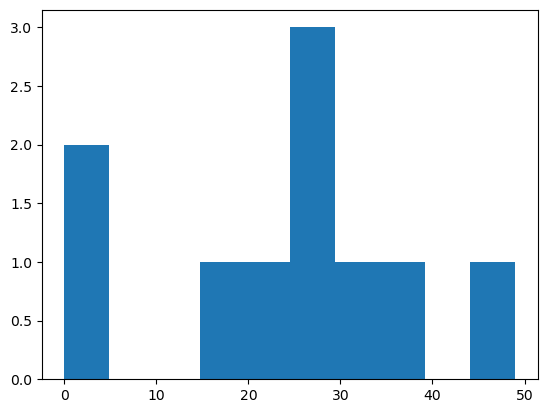

In [48]:
import matplotlib.pyplot as plt
plt.hist(df['age'])

<Axes: >

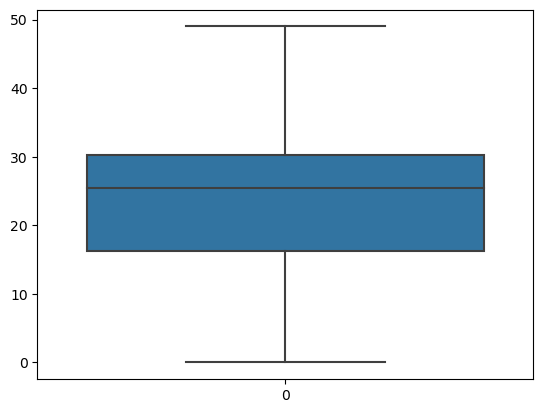

In [49]:
import seaborn as sns
sns.boxplot(df['age'])